In [93]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="minhquan6203/medical_captioning", filename="data.zip", local_dir='./' ,repo_type="dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


data.zip:   0%|          | 0.00/7.85G [00:00<?, ?B/s]

'./data.zip'

In [94]:
!unzip -qq data.zip

In [95]:
folder_path = "data/valid"

#Denoising

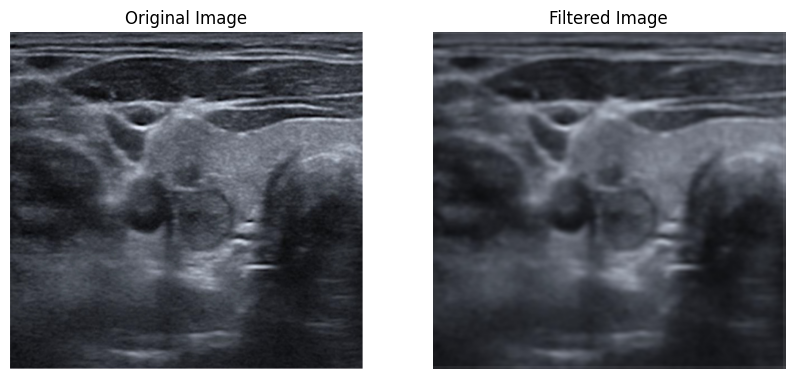

In [96]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('data/valid/ImageCLEFmedical_Caption_2024_valid_004896.jpg')

blurred_image = cv2.GaussianBlur(image, (9, 9), 10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.show()


In [97]:
import os
def load_image_path(folder_path):
    list_image_names = sorted(os.listdir(folder_path))
    list_image_paths = [os.path.join(folder_path,image_name) for image_name in list_image_names]
    return list_image_paths

In [98]:
!mkdir denoised

In [99]:
img_paths = load_image_path(folder_path)

for i in range(len(img_paths)):
  print(f'\r{i+1}/{len(img_paths)}', end='')

  image = cv2.imread(img_paths[i])
  blurred_image = cv2.GaussianBlur(image, (9, 9), 10)
  output_file = "/content/denoised/" + img_paths[i].split("/")[-1]
  cv2.imwrite(output_file, blurred_image)

9972/9972

#Image Enhancement

##Step by step

###Load image

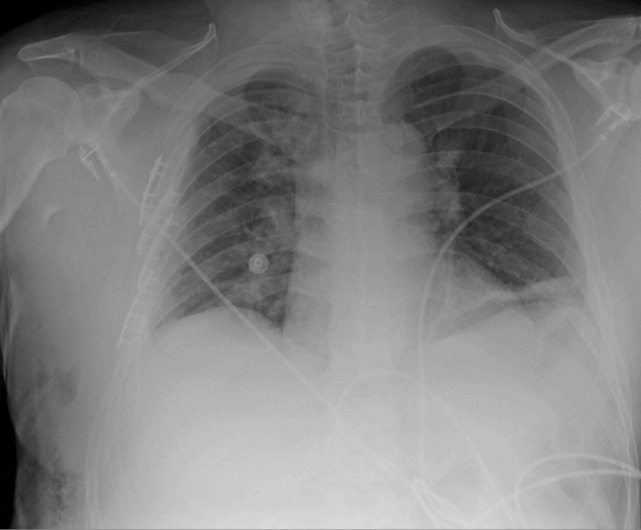

In [100]:


# Load the original image
original_image = cv2.imread('data/valid/ImageCLEFmedical_Caption_2024_valid_000045.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(original_image)

###Step 1: Laplace transform

In [101]:
def laplace_transform(image):
    laplace_kernel = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])
    laplace_image = cv2.filter2D(image, -1, laplace_kernel)
    return laplace_image

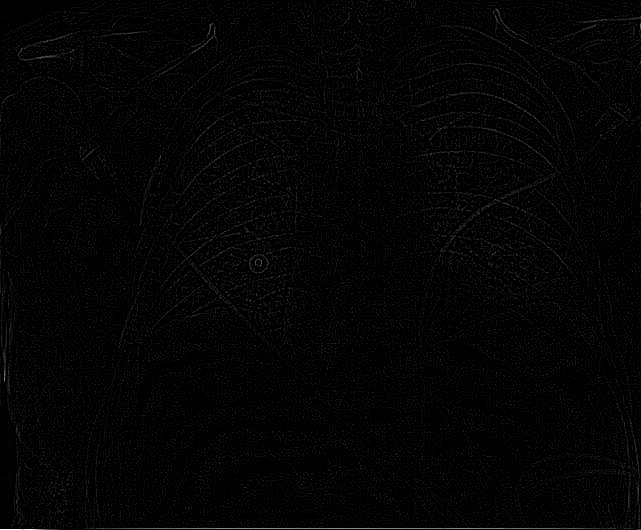

In [102]:
laplace_image = laplace_transform(original_image)
cv2_imshow(laplace_image)

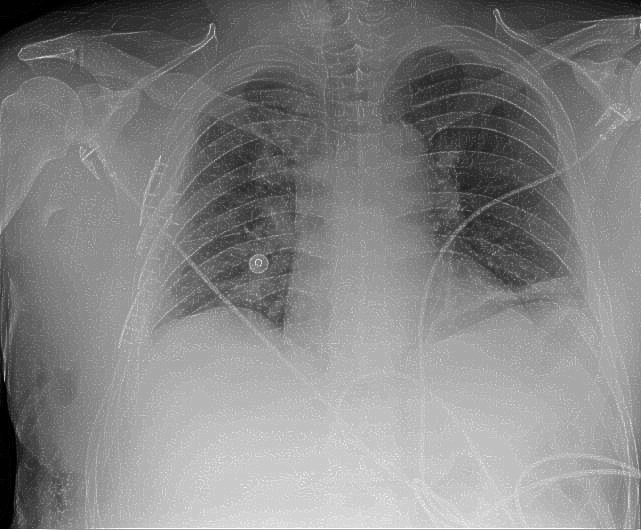

In [103]:
#Try adding laplace image to the original image
sharpen_image = cv2.add(original_image, laplace_image)
cv2_imshow(sharpen_image)

###Step 2: Sobel Gradient

In [104]:

def sobel_gradient(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    sobel_combined = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

    sobel_combined = np.uint8(sobel_combined)
    return sobel_combined

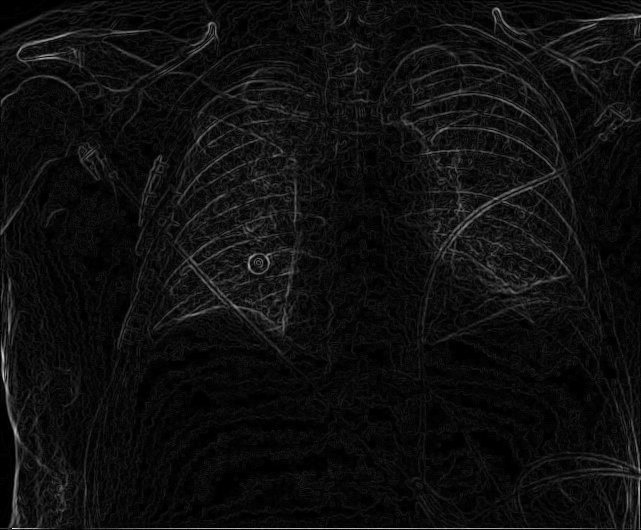

In [105]:
sobel_image = sobel_gradient(original_image)
cv2_imshow(sobel_image)

###Step 3: Smooth the image with a mean filter


In [106]:
def smooth_image(image):
    smooth_kernel = np.ones((5, 5), np.float32) / 25
    smoothed_image = cv2.filter2D(image, -1, smooth_kernel)
    return smoothed_image

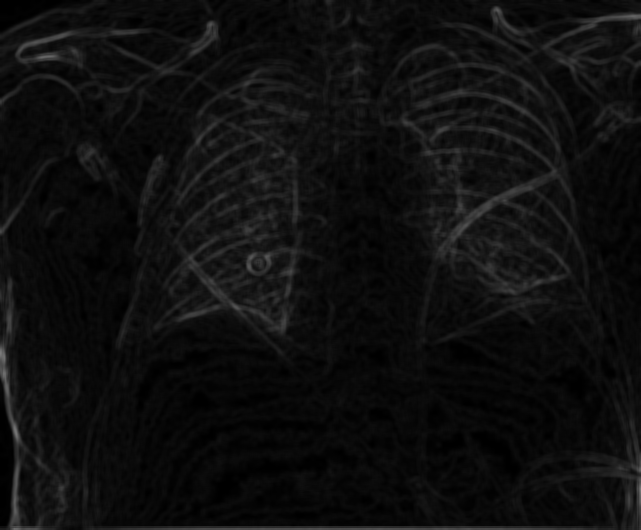

In [107]:
smoothed_image = smooth_image(sobel_image)
cv2_imshow(smoothed_image)

###Step 4: Add smoothed image to Laplace image (Multiplied image)

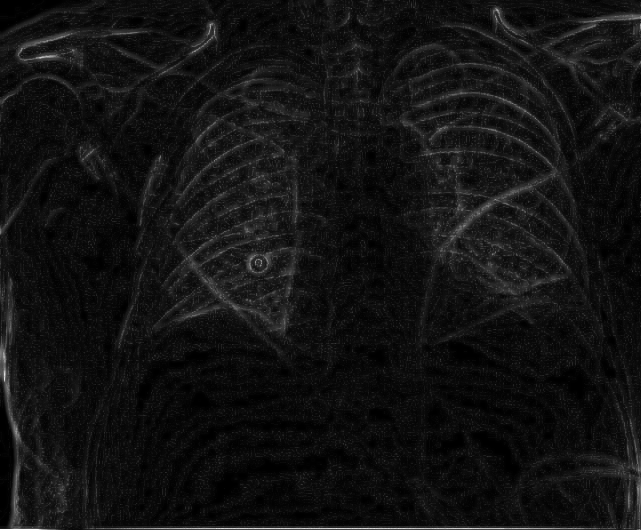

In [108]:
multiplied_image = cv2.add(smoothed_image, laplace_image)
cv2_imshow(multiplied_image)

### Step 5: Add the multiplied image to the original image

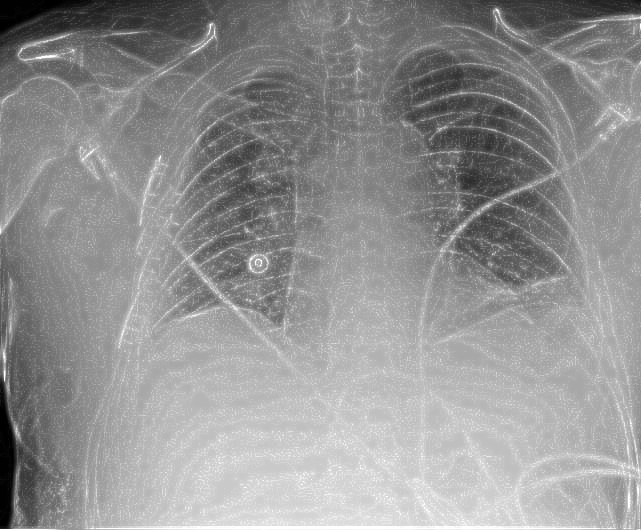

In [109]:
multiplied_added_image = cv2.add(original_image, multiplied_image)
cv2_imshow(multiplied_added_image)

###Step 6: Histogram equalization


In [110]:
def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

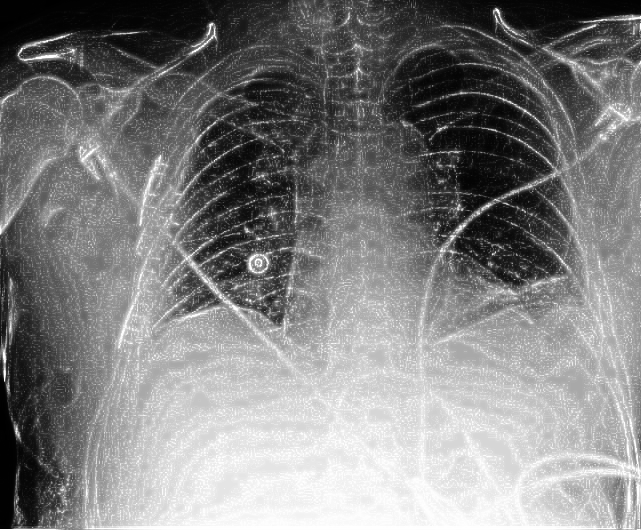

In [111]:
final_image = histogram_equalization(multiplied_added_image)
cv2_imshow(final_image)

###Images of all steps

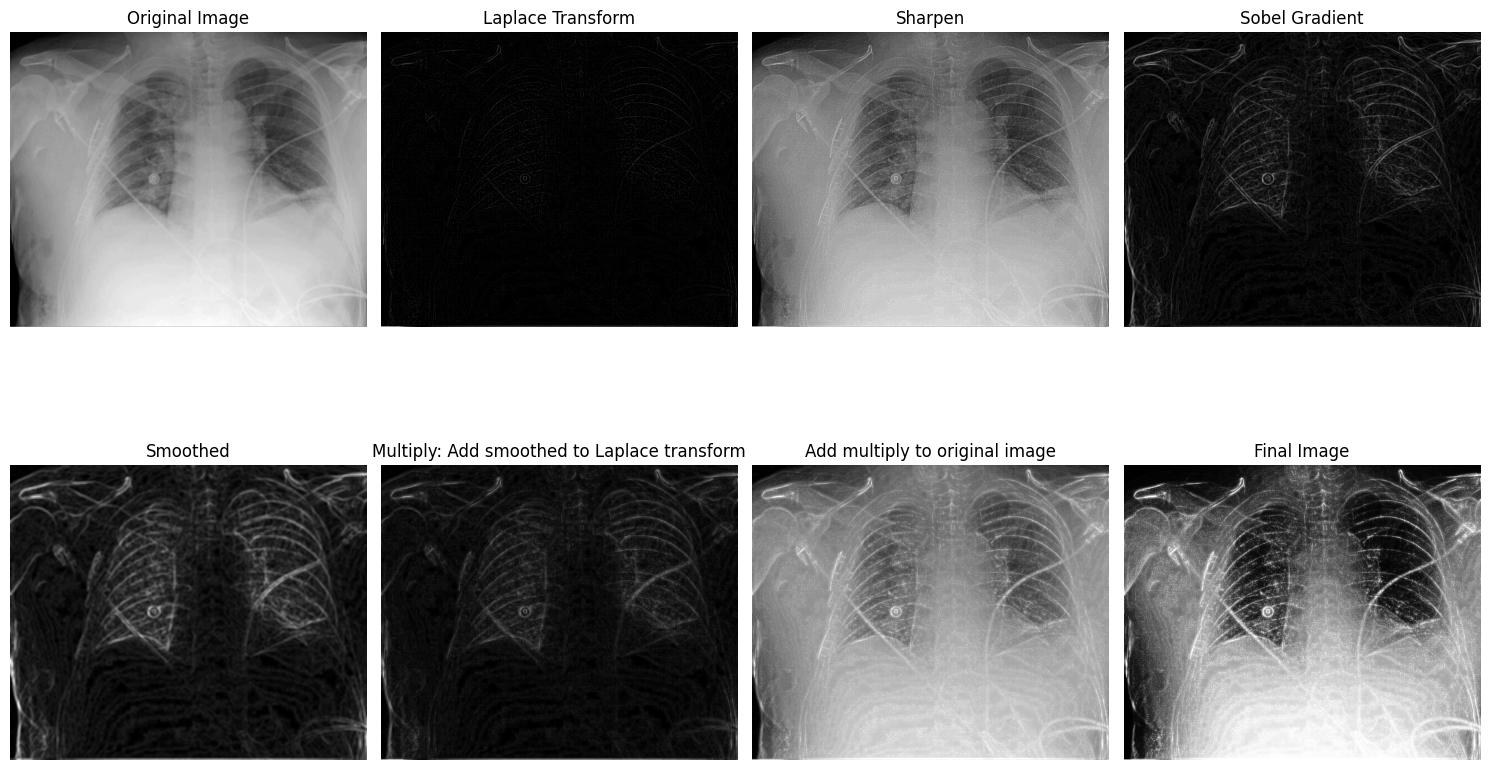

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(2, 4, 2)
plt.imshow(laplace_image, cmap='gray')
plt.title('Laplace Transform')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sharpen_image, cmap='gray')
plt.title('Sharpen')
plt.axis('off')


plt.subplot(2, 4, 4)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')


plt.subplot(2, 4, 5)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed')
plt.axis('off')


plt.subplot(2, 4, 6)
plt.imshow(multiplied_image, cmap='gray')
plt.title('Multiply: Add smoothed to Laplace transform')
plt.axis('off')


plt.subplot(2, 4, 7)
plt.imshow(multiplied_added_image, cmap='gray')
plt.title('Add multiply to original image')
plt.axis('off')


plt.subplot(2, 4, 8)
plt.imshow(final_image, cmap='gray')
plt.title('Final Image')
plt.axis('off')

plt.tight_layout()
plt.show()

##Process and save file

In [113]:
def image_enhancement(img_path):
  #Load image
  original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  #Step 1: Laplace transform
  laplace_image = laplace_transform(original_image)

  #Step 2: Sobel Gradient
  sobel_image = sobel_gradient(original_image)

  #Step 3: Smooth the image with a mean filter
  smoothed_image = smooth_image(sobel_image)

  #Step 4: Add smoothed image to Laplace image (Multiplied image)
  multiplied_image = cv2.add(smoothed_image, laplace_image)

  #Step 5: Add the multiplied image to the original image
  multiplied_added_image = cv2.add(original_image, multiplied_image)

  #Step 6: Histogram equalization
  final_image = histogram_equalization(multiplied_added_image)
  return final_image

In [114]:
!mkdir images_processed

In [115]:
img_paths = load_image_path("denoised")

for i in range(len(img_paths)):
  print(f'\r{i+1}/{len(img_paths)}', end='')

  image_processed = image_enhancement(img_paths[i])
  output_file = "/content/images_processed/" + img_paths[i].split("/")[-1]
  cv2.imwrite(output_file, image_processed)

9972/9972

In [116]:
%cd /content
!zip -r images_processed.zip images_processed

Streaming output truncated to the last 5000 lines.
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_002245.jpg (deflated 0%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_009600.jpg (deflated 0%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_008377.jpg (deflated 2%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_001053.jpg (deflated 1%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_002616.jpg (deflated 2%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_009349.jpg (deflated 2%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_000922.jpg (deflated 1%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_001782.jpg (deflated 4%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_006193.jpg (deflated 1%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_008982.jpg (deflated 0%)
  adding: images_processed/ImageCLEFmedical_Caption_2024_valid_009714